In [1]:
%matplotlib inline
import pyfolio as pf

In [12]:
stock_rets = pf.utils.get_symbol_rets('FB')

In [13]:
type(stock_rets)

pandas.core.series.Series

## H2 Basic Term Definitions
**Days in a business year:** 252
**Expected Return:** Average Return Percentage (Based off historical data)
**Risk Free Rate of Return:** Theoretical Rate of Return of an investment with zero risk (always > 0)

**Sortino Ratio:** (Expected Return - Risk Free Rate of Return) / Standard Deviation of Negative Returns
* Usage: Used in evaluating highly volatile stocks because this ratio penalizes only downside returns
Source code:
```python
def sortino_ratio(returns, returns_style='compound'):
    # average annual return = (1 + mean(all_daily_returns))^252 - 1
    numer = annual_return(returns, style=returns_style)  
    # annual volatility =  std(returns) * sqrt(252) 
    denom = annual_volatility(returns[returns < 0.0])

    if denom > 0.0:
        return numer / denom
    else:
        return np.nan
```
**Sharpe Ratio:** Sortino ratio but also punishes (includes) positive volatility
Source Code:
```python
def sharpe_ratio(returns, returns_style='compound'):
    numer = annual_return(returns, style=returns_style)
    denom = annual_volatility(returns)

    if denom > 0.0:
        return numer / denom
    else:
        return np.nan
```
**Omega Ratio:** 
* Usage: Relative measure of likelihood of acheiving a return above a specified value
* Other Notes: Essentially Ratio of upside returns to downside returns
Source code: 
```python
def omega_ratio(returns, annual_return_threshhold=0.0):
    daily_return_thresh = pow(1 + annual_return_threshhold, 1 / 252) - 1

    returns_less_thresh = returns - daily_return_thresh

    numer = sum(returns_less_thresh[returns_less_thresh > 0.0])
    denom = -1.0 * sum(returns_less_thresh[returns_less_thresh < 0.0])

    if denom > 0.0:
        return numer / denom
    else:
        return np.nan
```
**Max Drawdown:** Largest percentage drop since the stock started trading
**Calmar Ratio:** Average annual rate of return / Maximum Drawdown from the last 36 months

In [31]:
#pf.create_returns_tear_sheet(stock_rets)

In [27]:
stock_rets_AAPL = pf.utils.get_symbol_rets('AAPL')
stock_rets_AMZN = pf.utils.get_symbol_rets('AMZN')
stock_rets_IBM = pf.utils.get_symbol_rets('IBM')
stock_rets_MSFT = pf.utils.get_symbol_rets('MSFT')

In [28]:
stock_rets_IBM.shape

(11500,)

In [29]:
portfolio_4_assets_rets = pf.timeseries.portfolio_returns([stock_rets_AAPL, stock_rets_AMZN, stock_rets_IBM, stock_rets_MSFT], 
                                exclude_non_overlapping=True)

Entire data start date: 1997-05-19 00:00:00
Entire data end date: 2015-07-31 00:00:00


Out-of-Sample Months: 11
Backtest Months: 206
                   Backtest  Out_of_Sample  All_History
sortino_ratio          1.61           2.42         1.61
omega_ratio            1.18           1.26         1.19
max_drawdown          -0.64          -0.09        -0.64
calmar_ratio           0.47           2.60         0.47
annual_return          0.30           0.23         0.30
stability              0.92           0.71         0.93
sharpe_ratio           0.94           1.34         0.95
annual_volatility      0.32           0.17         0.31
alpha                  0.21           0.11         0.20
beta                   1.08           1.02         1.08
Opening /Library/Python/2.7/site-packages/pyfolio/data/factors.h5 in read-only mode
Opening /Library/Python/2.7/site-packages/pyfolio/data/factors.h5 in read-only mode

Worst Drawdown Periods
   net drawdown in %  peak date valley date recovery date 

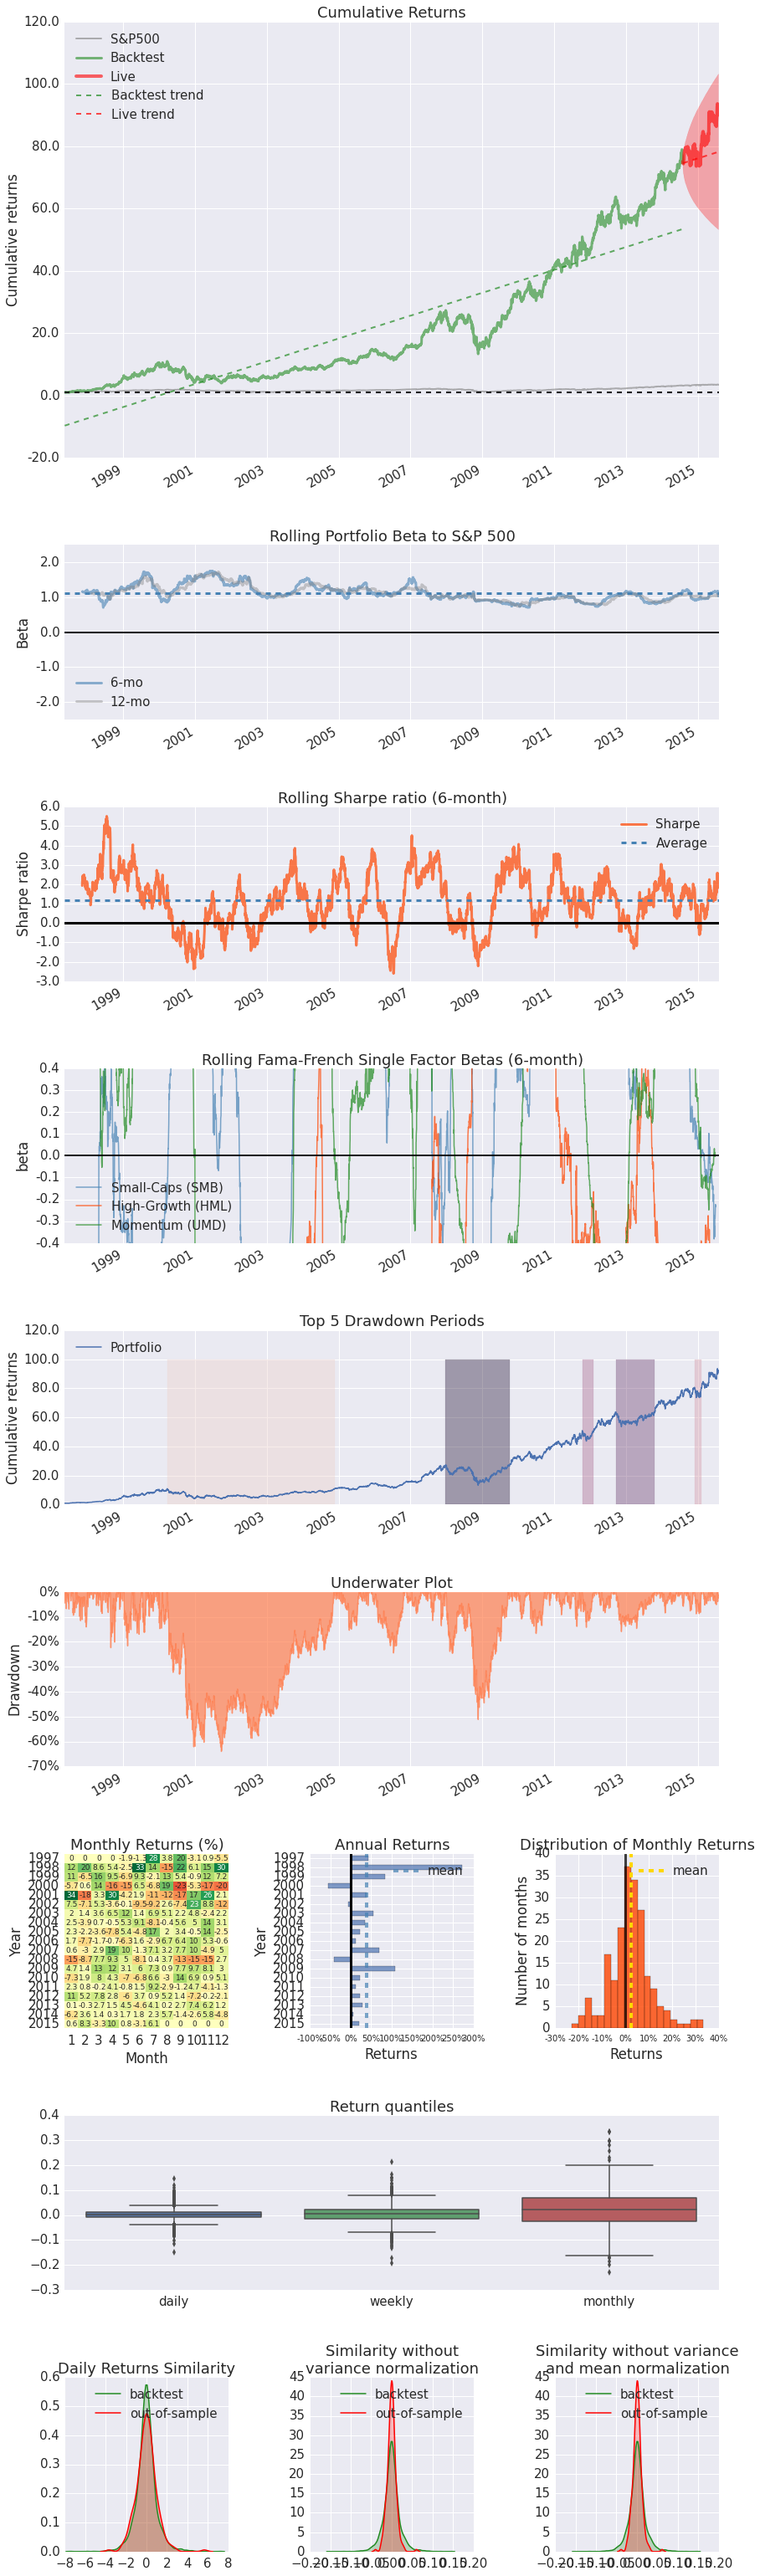

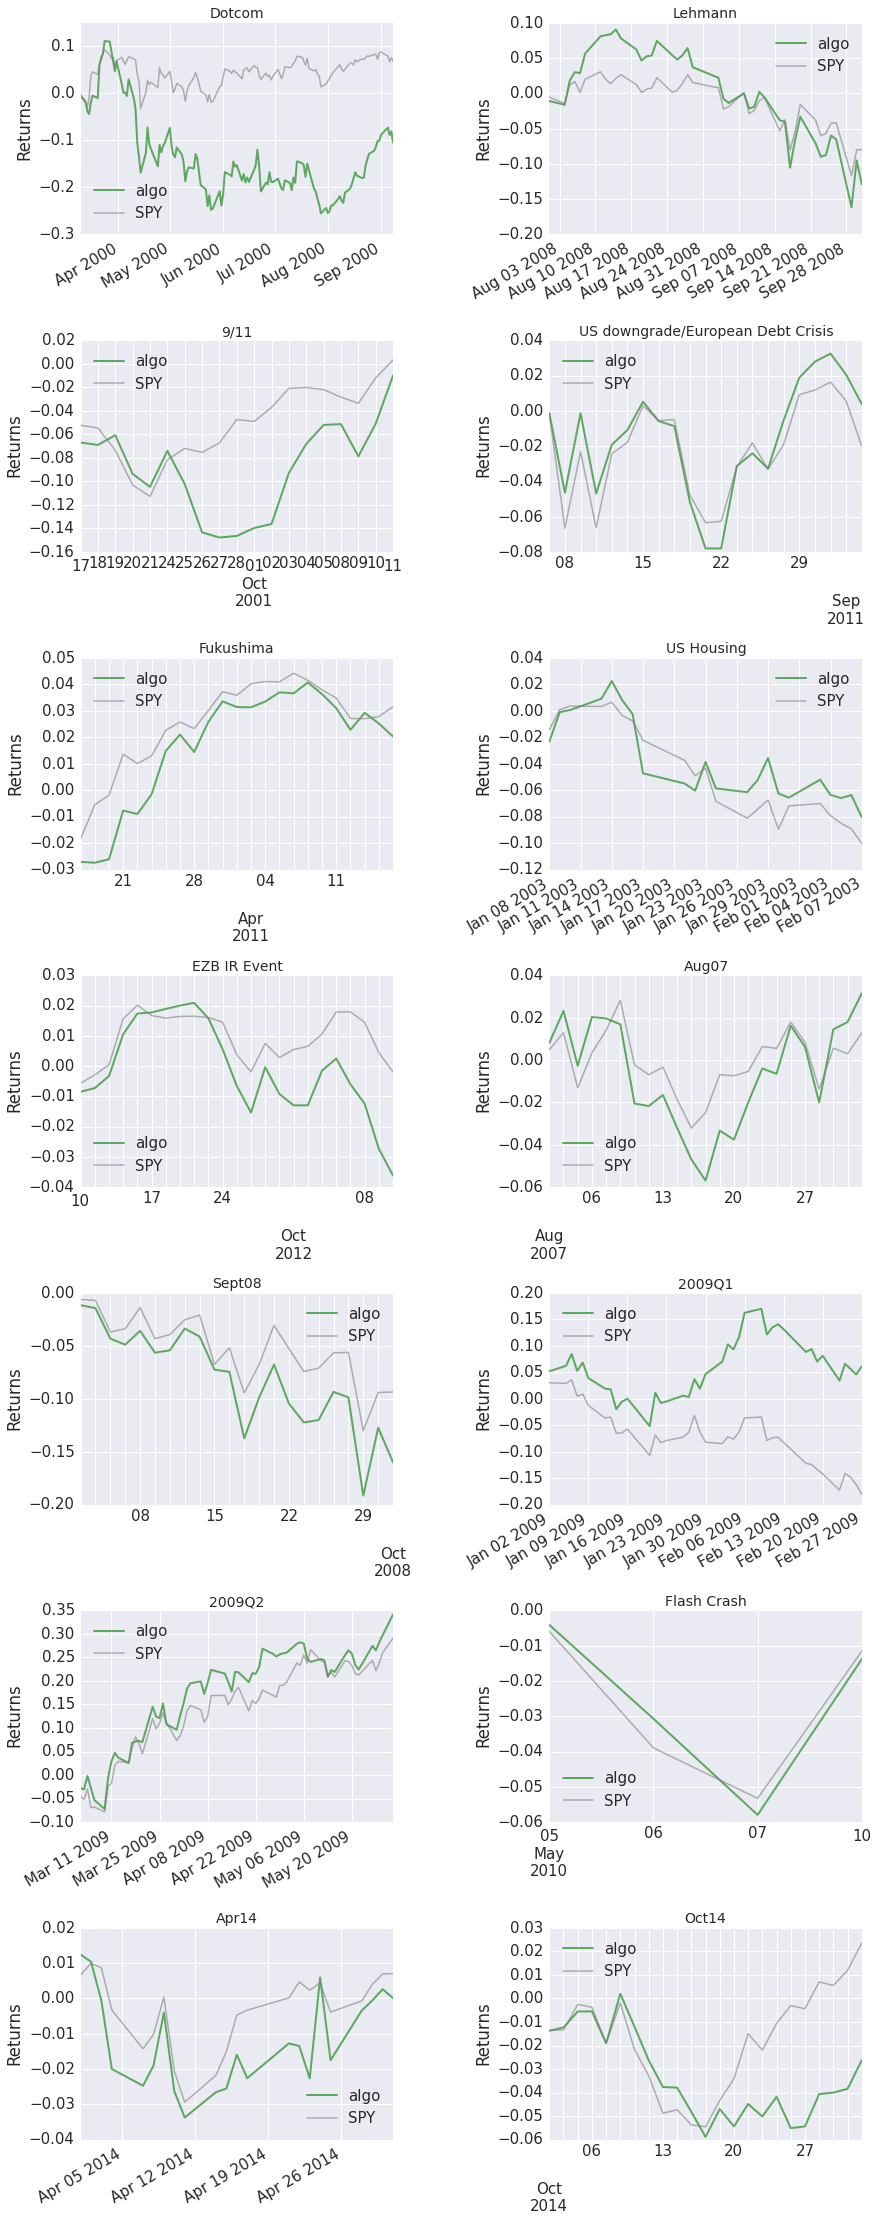

In [30]:
from datetime import datetime
pf.create_full_tear_sheet(portfolio_4_assets_rets, live_start_date=datetime(2014, 8, 2))